![APSSDC-LOGO](https://drive.google.com/uc?export=download&id=15AKQ6_-BixW4K6mL6RPphF5EKXqYF2zj)

<h1><center>Day04 Machine Learning Using Python</center></h1>

## Day04 Objectives 

## Classification models - 1	

- Introduction to categorical types of data
- Types of classification
    - Based on Prediction
    - Based on Class
- K-Nearest Neighbors Classifier
- Evaluation Metrics for classification Models

### K-Nearest Neighbor Classifier
KNN is a non-parametric and lazy learning algorithm. Non-parametric means there is no assumption for underlying data distribution. In other words, the model structure determined from the dataset. This will be very helpful in practice where most of the real world datasets do not follow mathematical theoretical assumptions. Lazy algorithm means it does not need any training data points for model generation. All training data used in the testing phase. This makes training faster and testing phase slower and costlier. Costly testing phase means time and memory. In the worst case, KNN needs more time to scan all data points and scanning all data points will require more memory for storing training data.

### How does the KNN algorithm work?
In KNN, K is the number of nearest neighbors. The number of neighbors is the core deciding factor. K is generally an odd number if the number of classes is 2. When K=1, then the algorithm is known as the nearest neighbor algorithm. This is the simplest case. Suppose P1 is the point, for which label needs to predict. First, you find the one closest point to P1 and then the label of the nearest point assigned to P1.

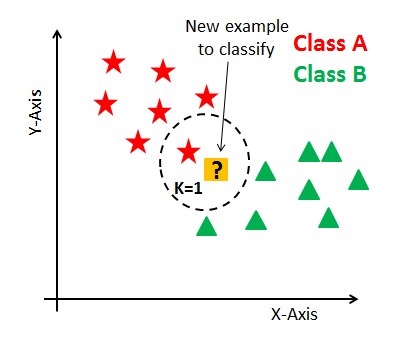

In [1]:
from IPython.display import Image, display;
display(Image(filename='Datasets_and_images/Knn_1.png'))

Suppose P1 is the point, for which label needs to be predicted. First, you find the k closest points to P1 and then classify point by majority vote of its k neighbors. Each object votes for their class and the class with the most votes is taken as the prediction. For finding closest similar points, you find the distance between points using distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance. KNN has the following basic steps:
* Calculate distance
* Find closest neighbors
* Vote for labels

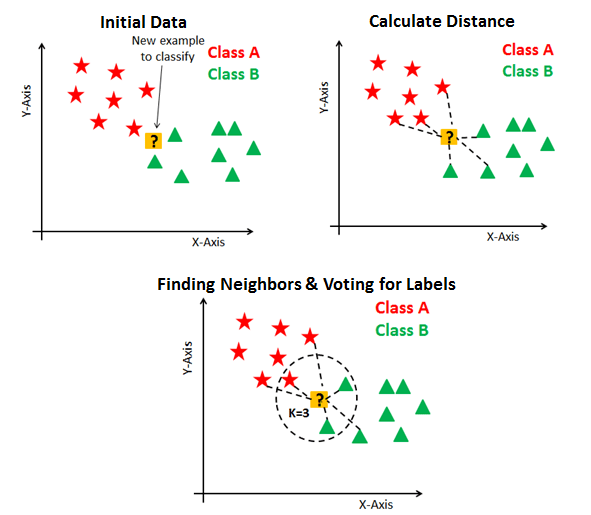

In [2]:
from IPython.display import Image, display;
display(Image(filename='Datasets_and_images/Knn_2.png'))

### Eager Vs. Lazy Learners
Eager learners mean when given training points will construct a generalized model before performing prediction on given new points to classify. You can think of such learners as being ready, active and eager to classify unobserved data points.
Lazy Learning means there is no need for learning or training of the model and all of the data points used at the time of prediction. Lazy learners wait until the last minute before classifying any data point. Lazy learner stores merely the training dataset and waits until classification needs to perform. Only when it sees the test tuple does it perform generalization to classify the tuple based on its similarity to the stored training tuples. Unlike eager learning methods, lazy learners do less work in the training phase and more work in the testing phase to make a classification. Lazy learners are also known as instance-based learners because lazy learners store the training points or instances, and all learning is based on instances.

### Curse of Dimensionality
KNN performs better with a lower number of features than a large number of features. You can say that when the number of features increases than it requires more data. Increase in dimension also leads to the problem of overfitting. To avoid overfitting, the needed data will need to grow exponentially as you increase the number of dimensions. This problem of higher dimension is known as the Curse of Dimensionality.
To deal with the problem of the curse of dimensionality, you need to perform principal component analysis before applying any machine learning algorithm, or you can also use feature selection approach. Research has shown that in large dimensions, Euclidean distance is not useful anymore. Therefore, you can prefer other measures such as cosine similarity, which get decidedly less affected by high dimension.

### How do you decide the number of neighbors in KNN?
Now, you understand the KNN algorithm working mechanism. At this point, the question arises that 
* How to choose the optimal number of neighbors? 
* And what are its effects on the classifier? 

The number of neighbors(K) in KNN is a hyperparameter that you need choose at the time of model building. You can think of K as a controlling variable for the prediction model.
Research has shown that no optimal number of neighbors suits all kind of data sets. Each dataset has it's own requirements. In the case of a small number of neighbors, the noise will have a higher influence on the result, and a large number of neighbors make it computationally expensive. Research has also shown that a small amount of neighbors are most flexible fit which will have low bias but high variance and a large number of neighbors will have a smoother decision boundary which means lower variance but higher bias.
Generally, Data scientists choose as an odd number if the number of classes is even. You can also check by generating the model on different values of k and check their performance. You can also try Elbow method here.

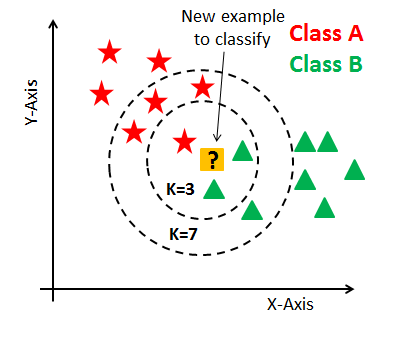

In [3]:
display(Image(filename='Datasets_and_images/Knn_3.png'))

### [Heart Disease](https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Classification/Heart_disease.csv)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Classification/Heart_disease.csv', index_col = 0)

In [6]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


|Attribute| Information|
|---|----|
|1| age|
|2| sex|
|3| chestpain type (4 values)|
|4| resting blood pressure|
|5| serum cholestoral in mg/dl|
|6| fasting blood sugar > 120 mg/dl|
|7| resting electrocardiographic results (values 0,1,2)|
|8| maximum heart rate achieved|
|9| exercise induced angina|
|10| oldpeak = ST depression induced by exercise relative to rest|
|11| the slope of the peak exercise ST segment|
|12| number of major vessels (0-3) colored by flourosopy|
|13|thal:<br>3 = normal; <br> 6 = fixed defect; <br>7 = reversable defect
|14| AHD alveolar hydatid disease|

In [7]:
df['ChestPain'].unique()

array(['typical', 'asymptomatic', 'nonanginal', 'nontypical'],
      dtype=object)

In [8]:
df['ChestPain'].value_counts()

asymptomatic    144
nonanginal       86
nontypical       50
typical          23
Name: ChestPain, dtype: int64

In [9]:
df.shape

(303, 14)

In [10]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [11]:
df.dropna(inplace = True)

In [12]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [13]:
df.shape

(297, 14)

### Converting Categorical data into Numercial Data

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
lbc = LabelEncoder()

In [17]:
y = lbc.fit_transform(df['AHD'])

y[:5]

array([0, 1, 1, 0, 0])

In [18]:
df['ChestPain'] = lbc.fit_transform(df['ChestPain'])
df['Thal'] = lbc.fit_transform(df['Thal'])

In [19]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,No
2,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,Yes
3,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,Yes
4,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,No
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,No


In [21]:
x = df.drop('AHD', axis = 'columns')

In [22]:
x.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
1,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0
2,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1
3,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2
4,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
xtr, xtt, ytr, ytt = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
model = KNeighborsClassifier(n_neighbors=3)

In [27]:
model.fit(xtr, ytr)

KNeighborsClassifier(n_neighbors=3)

In [31]:
ytr[0]

1

In [33]:
xtr[:1].values

array([[ 61. ,   1. ,   0. , 140. , 207. ,   0. ,   2. , 138. ,   1. ,
          1.9,   1. ,   1. ,   2. ]])

In [34]:
model.predict(xtr[:1].values)

array([1])

In [36]:
pred = model.predict(xtt)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [38]:
confusion_matrix(ytt, pred)

array([[35, 14],
       [15, 26]], dtype=int64)

In [39]:
accuracy_score(ytt, pred)

0.6777777777777778

In [40]:
precision_score(ytt, pred)

0.65

## Identifying Best K Value

In [41]:
acc = []
for k in range(3, 15, 2):
    model = KNeighborsClassifier(n_neighbors=k)

    model.fit(xtr, ytr)

    model.predict(xtr[:1].values)

    pred = model.predict(xtt)

    from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

    print(confusion_matrix(ytt, pred))

    acc.append(accuracy_score(ytt, pred))

    precision_score(ytt, pred)

[[35 14]
 [15 26]]
[[37 12]
 [16 25]]
[[36 13]
 [18 23]]
[[38 11]
 [21 20]]
[[38 11]
 [18 23]]
[[37 12]
 [18 23]]


In [42]:
acc

[0.6777777777777778,
 0.6888888888888889,
 0.6555555555555556,
 0.6444444444444445,
 0.6777777777777778,
 0.6666666666666666]

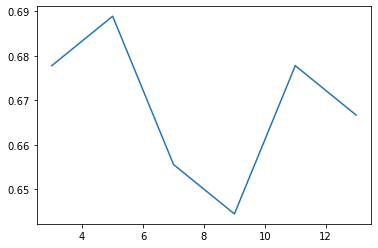

In [43]:
plt.plot(range(3, 15, 2), acc)